In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

In [4]:
training_data_generator = ImageDataGenerator(
                                             rescale = 1.0/255,
                                             horizontal_flip = True,
                                             vertical_flip = True,
                                             rotation_range = 45,
                                             height_shift_range = 0.2,
                                             width_shift_range = 0.2,
                                             fill_mode = "nearest"
                                             )

validation_data_generator = ImageDataGenerator(
                                               rescale = 1.0/255
                                               )

train_generator = training_data_generator.flow_from_directory(
    training_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 64
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [5]:
import keras
from keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam

def fireNet(input_shape):
    model = keras.models.Sequential([
                                     layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(256, (5,5), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(512, (5,5), activation="relu",),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Flatten(),
                                     layers.Dropout(0.3),

                                     layers.Dense(2048, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(1024, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = Adam(learning_rate = 1e-4),
        metrics =["acc"]

    )
    return model

In [ ]:
model = fireNet(input_shape)
model.summary()

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch= 15,
    epochs=50,
    validation_data=validation_generator,
   # validation_steps=15,
   validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-11 20:20:54.086289: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 20:20:54.444494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.6948 - loss: 0.5791 - val_acc: 0.8438 - val_loss: 0.4089
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9375 - loss: 0.2594 - val_acc: 0.9333 - val_loss: 0.2429
Epoch 3/50


2024-10-11 20:21:21.248956: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-11 20:21:21.314371: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.8201 - loss: 0.3681 - val_acc: 0.9152 - val_loss: 0.2441
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9219 - loss: 0.2959 - val_acc: 0.9333 - val_loss: 0.2233
Epoch 5/50


2024-10-11 20:21:55.721675: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.8934 - loss: 0.2516 - val_acc: 0.8438 - val_loss: 0.4164
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8125 - loss: 0.5008 - val_acc: 0.8000 - val_loss: 0.4313
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9163 - loss: 0.2545 - val_acc: 0.9420 - val_loss: 0.2269
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9219 - loss: 0.2061 - val_acc: 1.0000 - val_loss: 0.0811
Epoch 9/50


2024-10-11 20:23:00.127069: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9094 - loss: 0.2551 - val_acc: 0.9420 - val_loss: 0.2218
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9219 - loss: 0.1732 - val_acc: 0.8667 - val_loss: 0.4215
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.8961 - loss: 0.2512 - val_acc: 0.9420 - val_loss: 0.2082
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9844 - loss: 0.1693 - val_acc: 0.8667 - val_loss: 0.2356
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9318 - loss: 0.2362 - val_acc: 0.9330 - val_loss: 0.2164
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8750 - loss: 0.2954 - val_acc: 1.0000 - val_loss: 0.0886
Epoch 15/50


2024-10-11 20:24:56.925576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 20:24:57.202484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - acc: 0.9057 - loss: 0.2384 - val_acc: 0.9286 - val_loss: 0.2368
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8906 - loss: 0.3385 - val_acc: 1.0000 - val_loss: 0.0185
Epoch 17/50


2024-10-11 20:25:24.577815: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9329 - loss: 0.2120 - val_acc: 0.9464 - val_loss: 0.1905
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9062 - loss: 0.2504 - val_acc: 0.9333 - val_loss: 0.1500
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9361 - loss: 0.1727 - val_acc: 0.9375 - val_loss: 0.1911
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9062 - loss: 0.1871 - val_acc: 1.0000 - val_loss: 0.0794
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9304 - loss: 0.1840 - val_acc: 0.8973 - val_loss: 0.3111
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9375 - loss: 0.2271 - val_acc: 1.0000 - val_loss: 0.0319
Epoch 23/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - acc: 0.9194 - loss: 0.2326 - val_acc: 0.9196 - val_loss: 0.1917
Epoch 24/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8500 - loss: 0.1778 - val_acc: 0.9333 - val_loss: 0.2670
Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9246 - loss: 0.2

2024-10-11 20:30:05.099416: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9483 - loss: 0.1425 - val_acc: 0.9420 - val_loss: 0.1663
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0813 - val_acc: 1.0000 - val_loss: 0.0172
Epoch 35/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - acc: 0.9323 - loss: 0.1888 - val_acc: 0.9464 - val_loss: 0.1528
Epoch 36/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9531 - loss: 0.1555 - val_acc: 0.9333 - val_loss: 0.2249
Epoch 37/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - acc: 0.9496 - loss: 0.1304 - val_acc: 0.9420 - val_loss: 0.1539
Epoch 38/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9375 - loss: 0.1976 - val_acc: 0.8667 - val_loss: 0.3501
Epoch 39/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9474 - loss: 0.1294 - val_acc: 0.9196 - val_loss: 0.2938
Epoch 40/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8594 - loss: 0.4030 - val_acc: 1.0000 - val_loss: 0.0234
Epoch 41/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9308 - loss: 0.1

2024-10-11 20:33:08.939130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 20:33:10.051814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9483 - loss: 0.1639 - val_acc: 0.9330 - val_loss: 0.1962
Epoch 44/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8906 - loss: 0.2235 - val_acc: 1.0000 - val_loss: 0.0310
Epoch 45/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - acc: 0.9490 - loss: 0.1391 - val_acc: 0.9241 - val_loss: 0.1979
Epoch 46/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9375 - loss: 0.2182 - val_acc: 0.9333 - val_loss: 0.3463
Epoch 47/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.9449 - loss: 0.1548 - val_acc: 0.9375 - val_loss: 0.1614
Epoch 48/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9688 - loss: 0.0945 - val_acc: 1.0000 - val_loss: 0.0153
Epoch 49/50


2024-10-11 20:34:57.609771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 20:34:57.906508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - acc: 0.9514 - loss: 0.1354 - val_acc: 0.9330 - val_loss: 0.1866
Epoch 50/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9531 - loss: 0.1616 - val_acc: 0.9333 - val_loss: 0.3773


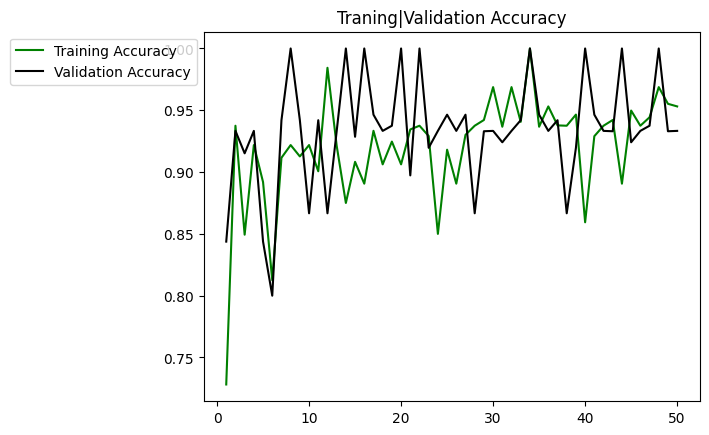

<Figure size 640x480 with 0 Axes>

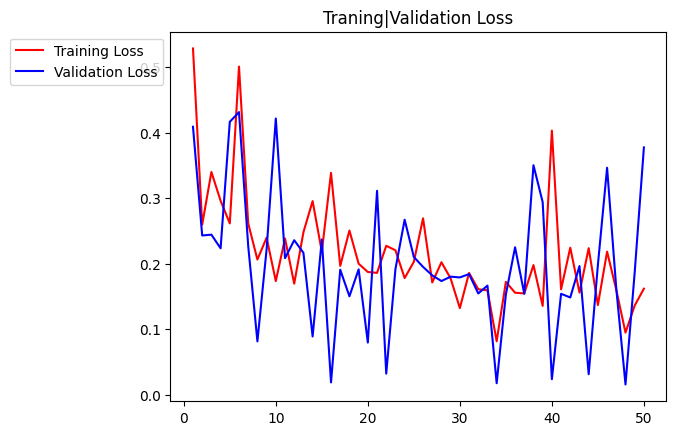

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

#epochs = range(1,101)
epochs = range(1, len(val_acc) + 1)


plt.plot(epochs, acc, "g",label="Training Accuracy")
plt.plot(epochs, val_acc, "black",label="Validation Accuracy")
plt.title("Traning|Validation Accuracy")
#plt.legend(loc ="0")
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.figure()
plt.show()

plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Traning|Validation Loss")
#plt.legend(loc ="0")
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)


plt.figure()
plt.show()

In [ ]:
model.save("./models/fire_model.h5")
keras.saving.save_model(model, 'my_model.keras')

In [10]:
import cv2
import numpy as np
from keras.models import load_model

In [ ]:
model = load_model("./models/fire_model.h5")
path = "./test/test.jpg"
video_path = "./test/test.mp4"

In [ ]:
test_img = cv2.imread(path)

img = np.asarray(test_img)
img = cv2.resize(img,(224, 224))

img = img/255
img = np.expand_dims(img,axis=0)
print(img.shape)

predictions = model.predict(img)
#pred = np.max(predict) or
#pred = max(predict[0])
pred = np.argmax(predictions[0])
probability = predictions[0][pred]
probability_ = f"%{probability*100:.2f}"


if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font =cv2.FONT_HERSHEY_SIMPLEX
color =(0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120), font, 1, color,2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
path ="test/test.jpg"
test_img = cv2.imread(path)
img = np.asarray(test_img)

img = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis = 0)
print(img.shape)

predict = model.predict(img)
pred = np.argmax(predict[0])
probability = predict[0][pred]

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred ==1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120),font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()


(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.01421069 0.98578936]] 1 0.98578936 %98.58


In [14]:
test_img = cv2.imread(path)
img = np.asarray(test_img)

img = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis = 0)
print(img.shape)

predict = model.predict(img)
pred = np.argmax(predict[0])
probability = predict[0][pred]

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred ==1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120),font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.01421069 0.98578936]] 1 0.98578936 %98.58


In [15]:
"""
#video_path = "test/test.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame =cap.read()
    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255
    img = img.reshape(1,224,224,3)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = f"%{probability*100:.2f}"

    if pred == 1:
        label = "Fire"
        color = (0, 255, 0)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, label, (35,60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35,120), font, 1, color, 2)

    cv2.imshow("Camera 001", frame)

    if cv2.waitkey(10) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows
"""
import cv2
import numpy as np

# video path
video_path = "test/test.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    img = np.asarray(frame)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    img = img.reshape(1, 224, 224, 3)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = f"%{probability * 100:.2f}"

    if pred == 1:
        label = "Fire"
        color = (0, 255, 0)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, label, (35, 60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35, 120), font, 1, color, 2)

    cv2.imshow("Camera 001", frame)

    # waitKey is with capital 'K'
    if cv2.waitKey(10) & 0xFF == ord("q"):  
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━